## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [111]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## **1. Datos**

In [23]:
df = pd.read_csv('./Datos/titanic.csv')

In [24]:
df.sample()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
837,0,2,Mr. Thomas Charles Mudd,male,16.0,0,0,10.5


## **2. EDA**

### **Exploración inicial**

In [25]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [26]:
df.reset_index(inplace=True)

In [28]:
df.describe()

,index,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,443.000000,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,256.199141,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,221.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,443.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,664.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,886.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### **Limpieza de los datos**

In [29]:
df.drop('Name', axis=1, inplace=True)

In [31]:
df.rename(columns = {
    'index': 'ID',
    'Siblings/Spouses Aboard': 'SibSp',
    'Parents/Children Aboard': 'Parch'
}, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        887 non-null    int64  
 1   Survived  887 non-null    int64  
 2   Pclass    887 non-null    int64  
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   Parch     887 non-null    int64  
 6   Fare      887 non-null    float64
 7   Sex_male  887 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.5 KB


In [51]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [56]:
df.rename(columns = {
    'Sex_male': 'Sex'
}, inplace=True)

In [60]:
df.sample()

,ID,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
711,711,0,2,52.0,0,0,13.0,1


### **Preparación para el modelo**

In [64]:
X = df.drop(['Survived', 'ID'], axis=1)
y = df[['Survived']]

In [77]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13)

## **3. Modelaje**

In [86]:
model_tree = DecisionTreeClassifier(
    max_depth=2,
    random_state=13
)

In [87]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [117]:
importances = model_tree.feature_importances_

array([0.18928859, 0.07767965, 0.        , 0.        , 0.        ,
       0.73303177])

In [147]:
feat_import = pd.DataFrame([
    model_tree.feature_names_in_, 
    model_tree.feature_importances_
]).T

feat_import.columns = ['Variable', 'Importance']
feat_import.sort_values('Importance', ascending = False, inplace=True)

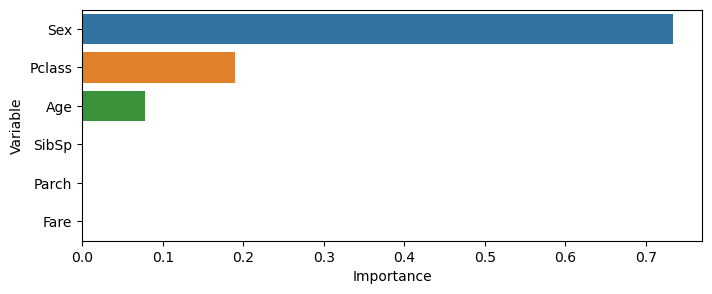

In [150]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.barplot(
    data=feat_import, 
    y='Variable', 
    x='Importance'
)

plt.show()

### **Evaluación del modelo**

#### **Entrenamiento**

In [104]:
y_pred_train = model_tree.predict(X_train)

In [112]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.8

In [107]:
print(classification_report(y_pred_train, y_train))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       473
           1       0.55      0.88      0.68       147

    accuracy                           0.80       620
   macro avg       0.75      0.83      0.77       620
weighted avg       0.86      0.80      0.81       620



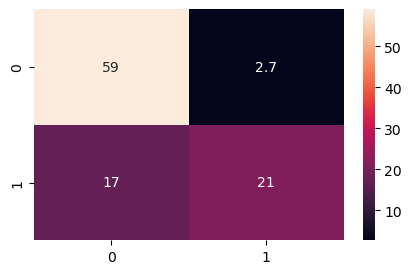

In [116]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.heatmap(confusion_matrix(y_train, y_pred_train)/len(y_train)*100, annot=True)

plt.show()

#### **Testeo**

In [108]:
y_pred_test = model_tree.predict(X_test)

In [113]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.7752808988764045

In [115]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       162
           1       0.88      0.50      0.63       105

    accuracy                           0.78       267
   macro avg       0.81      0.73      0.74       267
weighted avg       0.80      0.78      0.76       267



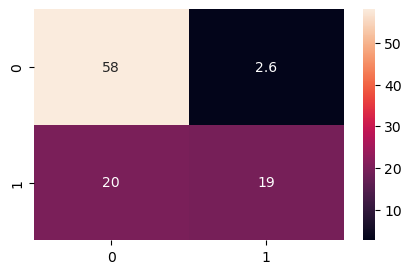

In [114]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.heatmap(confusion_matrix(y_test, y_pred_test)/len(y_test)*100, annot=True)

plt.show()